<a href="https://colab.research.google.com/github/Abishethvarman/ChatGPT-Education/blob/main/topic_modelling_chatgpt_education_LDA%2Bvisualizer%2Bcombined_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
!pip install wordcloud pyLDAvis

In [2]:
import pandas as pd
import nltk
import torch
import numpy as np
import matplotlib.pyplot as plt
import string
import pyLDAvis
import pyLDAvis.lda_model
from gensim.corpora import Dictionary
from sklearn.manifold import TSNE
import os
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping c

True

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

%cd /mydrive/dataset/

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/gdrive
 17APC3292
'17APC3292 (1).pdf'
'17APC3292 CA 2.m4a'
'17APC3292_final report _AMS.pdf'
'17APC3292_Form A.pdf'
'17APC3292_Form B_Signed.pdf'
'17APC3292_Form C-1.pdf'
'17APC3292_Form C-2.pdf'
'17APC3292_Form C-3.pdf'
'17APC3292_Form C-4.pdf'
'17APC3292_Form E (1).pdf'
'17APC3292_Form E.pdf'
 17APC3292_Industrial_Training_Presentation_V2_AV.pptx
 17APC3292_Industrial_Training_Report.pdf
 17APC3292_IS31229_Assignment.docx.pdf
'17APC3292_Mini Project final presentation template.pptx'
 17APC3292_Mini_Project_Final_Presentation_Trim.mp4
'17APC3292 - Mini Project Project Progress Journal 2021_editable_Forth phase AMS.pdf'
'17APC3292 - Mini Project Project Progress Journal 2021_editable_second phase MS.pdf'
'17APC3292 - Mini Project Project Progress Journal 2021_editable_Third phase AMS.pdf'
'17APC3292 - Mini Project Project Progress Journal 2021_editable till 30.12.2021 (1).pdf'
 17APC3292_mini-project-proposal.pdf
 17APC3292_Mini-Project-Prototype-Demonstration_Trim2

In [4]:
%cd /mydrive/dataset/

/content/gdrive/My Drive/dataset


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
data = pd.read_csv("ChatGPT_Tweets_Dataset_Full.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
row_count = data.shape[0]
print("Total Tweets:", row_count)

Total Tweets: 3821843


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0             tweet_id  \
0           0  1597847994526842880   
1           1  1597847639823118336   
2           2  1597846446765936640   
3           3  1597845565056126976   
4           4  1597845515991142400   

                                       original_text sentiment          tasks  \
0  [GPT-3] This post discusses the need for an au...   neutral  ensure safety   
1  @soniajoseph_ Gpt = black box = fancy statitis...   neutral            NaN   
2  Today, I'm working on building my own AI writi...   neutral            NaN   
3  Ars Technica: OpenAI upgrades GPT-3, stunning ...  positive            NaN   
4  @RandomSprint @goth600 @jeremymstamper @heyors...  negative            NaN   

  users             technologies                         organizations  \
0   NaN  artificial intelligence  GPT3, Artificial Intelligence AI, AI   
1   NaN                      NaN                                   Gpt   
2   NaN                      api                        AI, GPT3 Heres   
3   NaN                      NaN                                  GPT3   
4   guy                      NaN                                  GPT3   

  job_competencies job_profiles  \
0            logic          NaN   
1              NaN          NaN   
2            plan     secretary   
3              NaN          NaN   
4              NaN          NaN   

                                               nouns  \
0  gpt3, post, need, audit, system, intelligence,...   
1                           box, fancy, statitistics   
2  today, ai, w, gpt3, plan, playground, connect,...   
3            ars, upgrades, poetry, lyrics, username   
4                 type, guy, gpt3, stop, nobody, hes   

                                               verbs  \
0       discusses, ensure, suggests, focus, creating   
1                                                NaN   
2  im, working, building, writing, heres, explore...   
3                  technica, gpt3, stunning, rhyming   
4                                    talks, believes   

                          adjectives  \
0                         artificial   
1               username, gpt, black   
2  own, assistant, openai, api, cool   
3                             openai   
4               username, cant, real   

                                   subjects  \
0      this post, it, the development of ai   
1                                       NaN   
2  i, assistant w gpt3, the plan, this, you   
3                                       NaN   
4                           who, nobody, he   

                                             objects    predicates  \
0  the need for an audit system for artificial in...     discusses   
1                                                NaN  statitistics   
2  my own, openai playground connect, api ship, a...       working   
3                rhyming poetry and lyrics, username      stunning   
4                                          guy, gpt3          type   

                                               topic  
0  gpt4, ai, gpt3, deeplearning gpt, ai gpt, will...  
1     gpt, ask gpt, gpt gpt, lol, use gpt, using gpt  
2                                  chatgpt, ai, will  
3                                  chatgpt, ai, will  
4                                  chatgpt, ai, will

In [8]:
data = data.drop_duplicates(subset='original_text')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
row_count_after_cleaning_duplicates = data.shape[0]
print("Total Tweets:", row_count_after_cleaning_duplicates)

Total Tweets: 3752032


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
 # Preprocessing
def preprocess_text(text):
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove punctuation and special characters
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    custom_stopwords = ["more", "good", "one", "two","via","gpt", "chatgpt"]
    stop_words.update(custom_stopwords)

    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Reconstruct text
    processed_text = ' '.join(tokens)
    return processed_text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Apply preprocessing to your dataset
data['processed_text'] = data['original_text'].apply(preprocess_text)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Feature extraction - CountVectorizer
vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the text data
X = vectorizer.fit_transform(data['processed_text'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Apply LDA
num_topics = 25
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
topic_matrix = lda_model.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Display top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    # top_words = [vectorizer.get_feature_names()[i] for i in top_words_idx]
    print(f"Topic {topic_idx}:")
    print(top_words)


Topic 0:
['http', 'job', 'ai', 'bot', 'twitter', 'openai', 'software', 'developer', 'robot', 'service']
Topic 1:
['use', 'content', 'http', 'tool', 'ai', 'help', 'way', 'life', 'writing', 'marketing']
Topic 2:
['think', 'people', 'know', 'work', 'like', 'even', 'still', 'time', 'human', 'need']
Topic 3:
['project', 'like', 'ask', 'give', 'really', 'great', 'right', 'something', 'would', 'http']
Topic 4:
['http', 'elonmusk', 'got', 'know', 'lol', 'chat', 'well', 'yet', 'pretty', 'cool']
Topic 5:
['http', 'ai', 'best', 'wait', 'market', 'project', 'check', 'ca', 'cgpt', 'early']
Topic 6:
['http', 'ai', 'crypto', 'nft', 'gt', 'airdrop', 'bitcoin', 'eth', 'btc', 'coin']
Topic 7:
['http', 'idea', 'school', 'system', 'access', 'plan', 'need', 'using', 'high', 'kid']
Topic 8:
['http', 'ai', 'openai', 'intelligence', 'chatbot', 'artificial', 'tech', 'company', 'news', 'musk']
Topic 9:
['like', 'http', 'would', 'look', 'exam', 'sound', 'test', 'reply', 'without', 'value']
Topic 10:
['http', 'tw

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


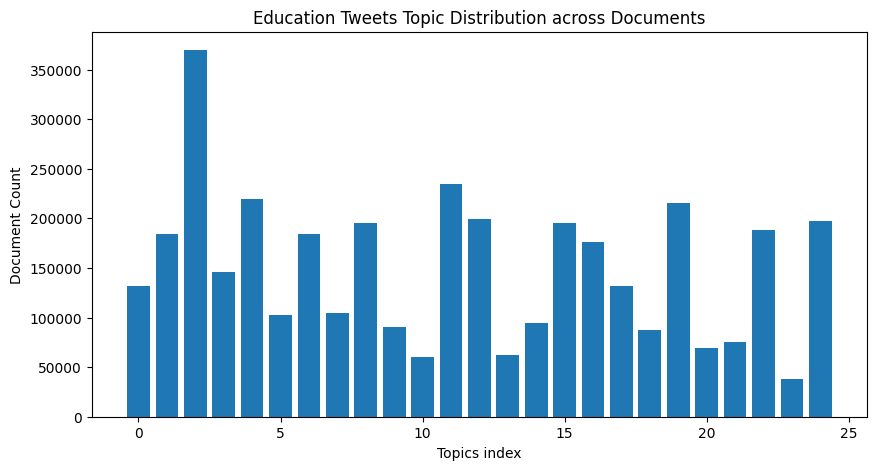

In [16]:
topic_distribution = topic_matrix.argmax(axis=1)
topic_counts = np.bincount(topic_distribution)

plt.figure(figsize=(10, 5))
plt.bar(range(len(topic_counts)), topic_counts)
plt.xlabel('Topics index')
plt.ylabel('Document Count')
plt.title('Education Tweets Topic Distribution across Documents')
plt.show()

In [17]:
import plotly.express as px

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
import plotly.express as px

num_words = 10

for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-num_words:][::-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    word_importance = np.exp(topic[top_words_idx])

    # Create an interactive bar plot using Plotly
    fig = px.bar(x=word_importance, y=top_words, orientation='h', title=f"Topic {topic_idx} - Most Important Fake News Key Words")
    fig.update_layout(xaxis_title="Word Importance", yaxis_title="Words")
    fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-10749df51c74>:8: RuntimeWarning: overflow encountered in exp
  word_importance = np.exp(topic[top_words_idx])


<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-18-10749df51c74>:8: RuntimeWarning:

overflow encountered in exp



In [19]:
num_words = 10  # Number of most used words to display

for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-num_words:][::-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    word_importance = np.exp(topic[top_words_idx])

    # Create an interactive bar plot using Plotly
    fig = px.bar(x=word_importance, y=top_words, orientation='h', title=f"Topic {topic_idx} - Most Used Words in Fake News")

    # Add color and hover data
    fig.update_traces(marker_color='blue', hovertemplate='%{x:.2f}', hoverinfo='x+y')

    # Add annotations for the highest word importance
    max_importance = max(word_importance)
    max_idx = word_importance.argmax()
    fig.add_annotation(x=max_importance, y=top_words[max_idx], text=f'Max Importance: {max_importance:.2f}', showarrow=True)

    # Customize layout
    fig.update_layout(
        xaxis_title="Word Importance",
        yaxis_title="Words",
        font=dict(family="Arial", size=12),
        title_font=dict(size=16),
        plot_bgcolor='white'
    )

    fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-19-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



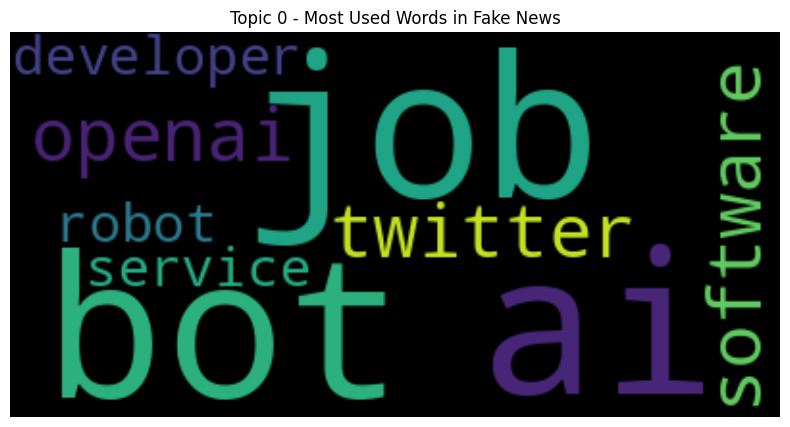

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



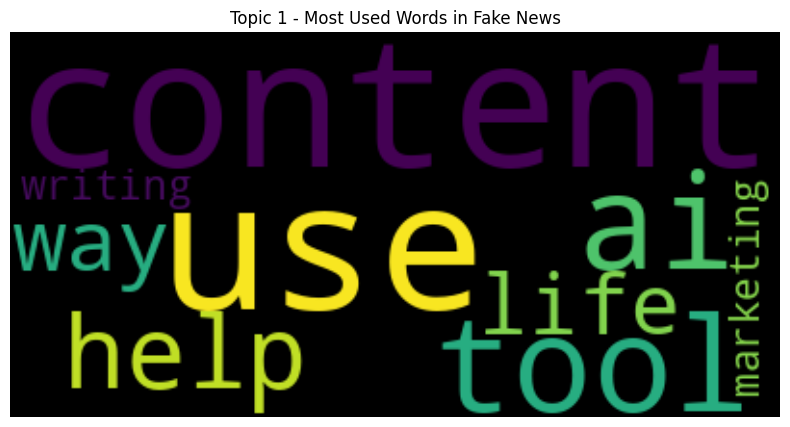

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



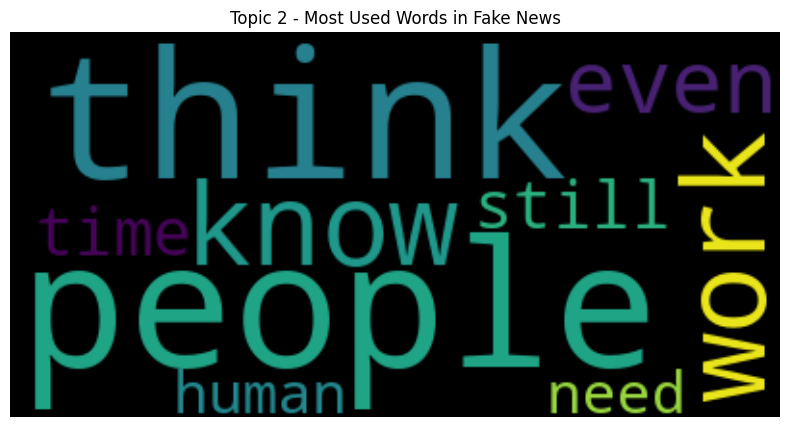

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



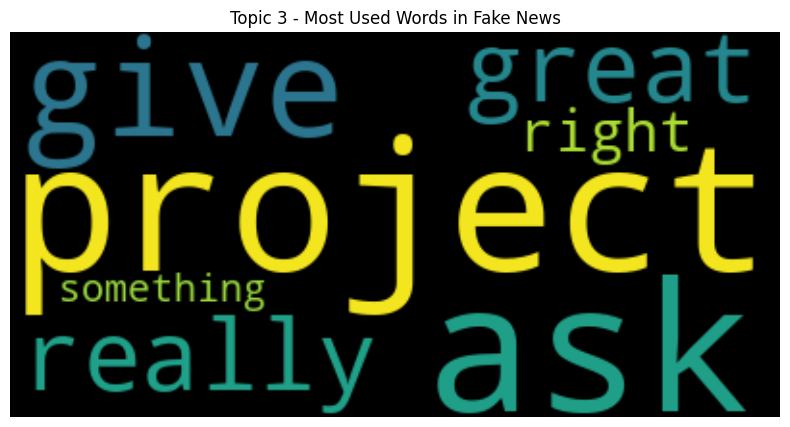

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



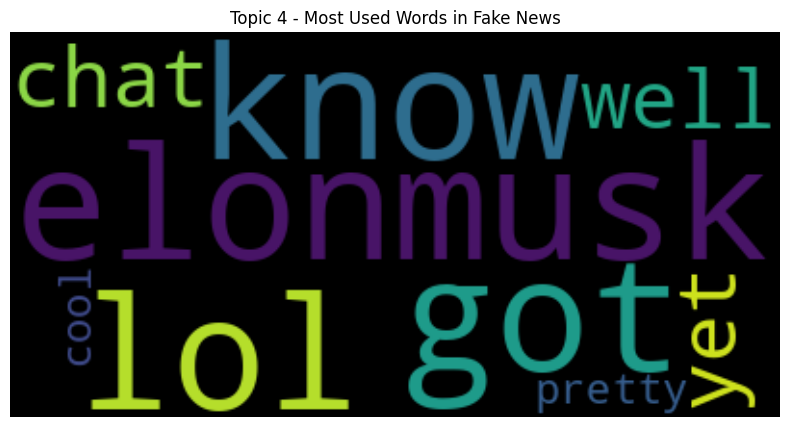

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



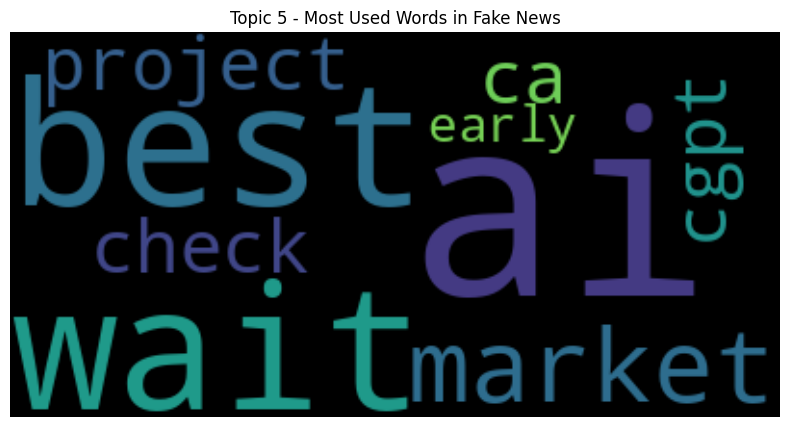

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



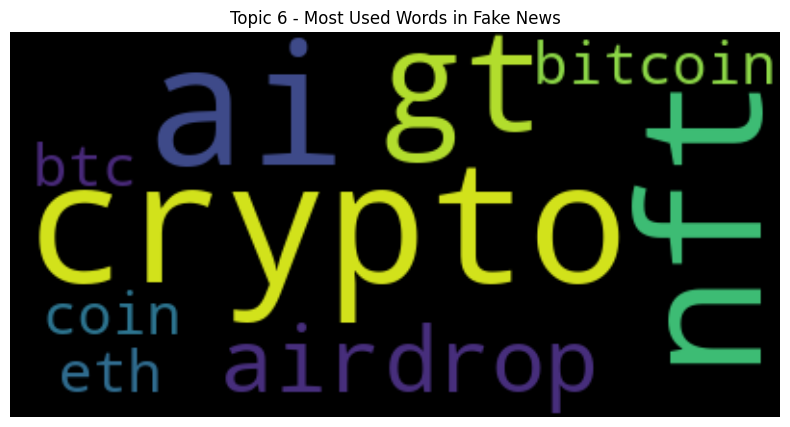

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



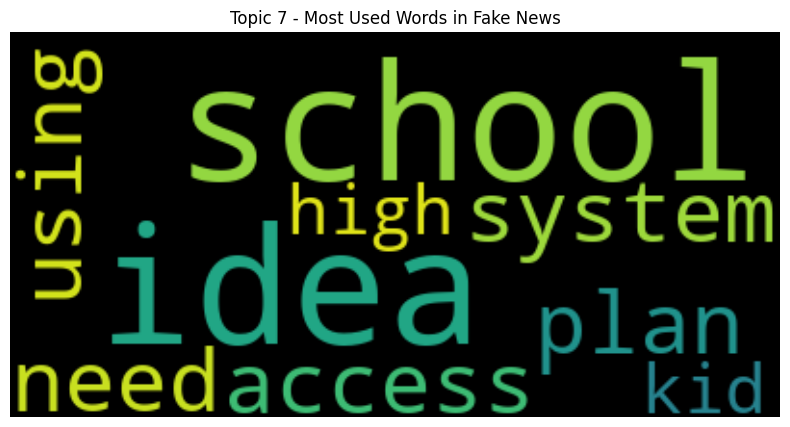

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



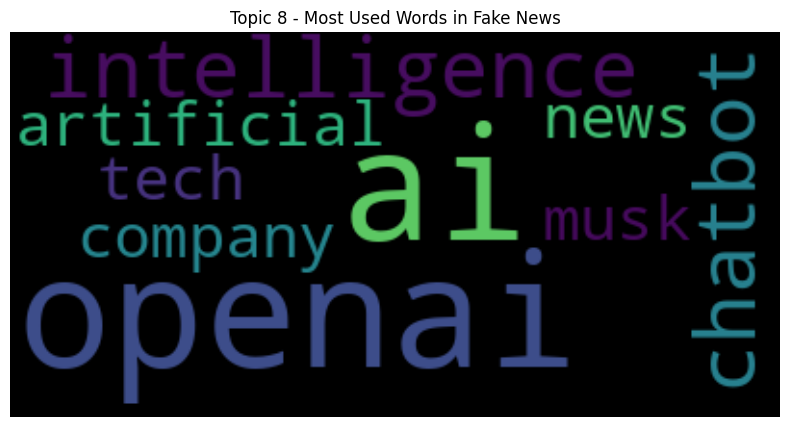

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



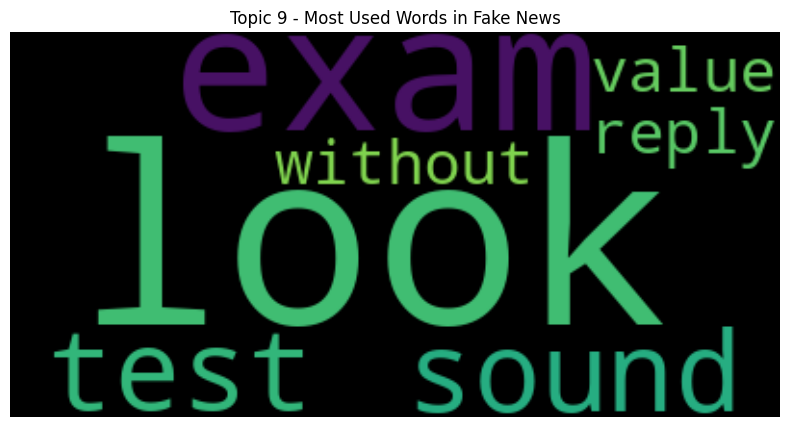

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



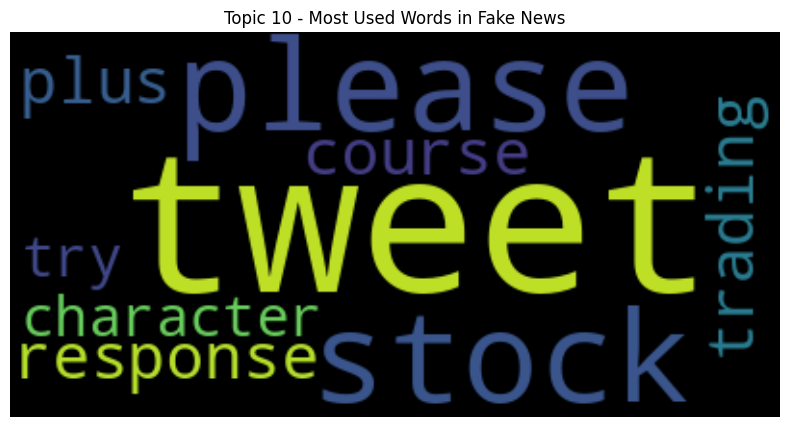

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



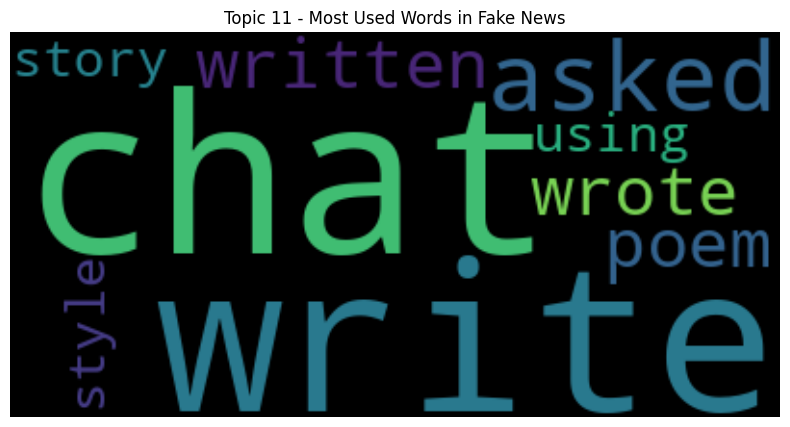

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



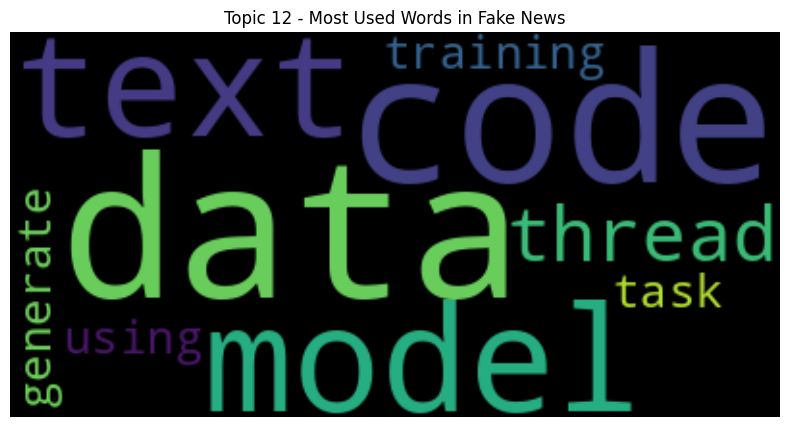

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



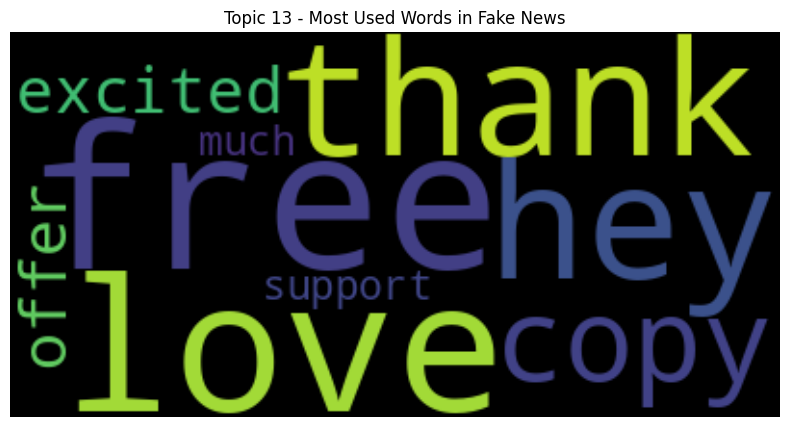

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



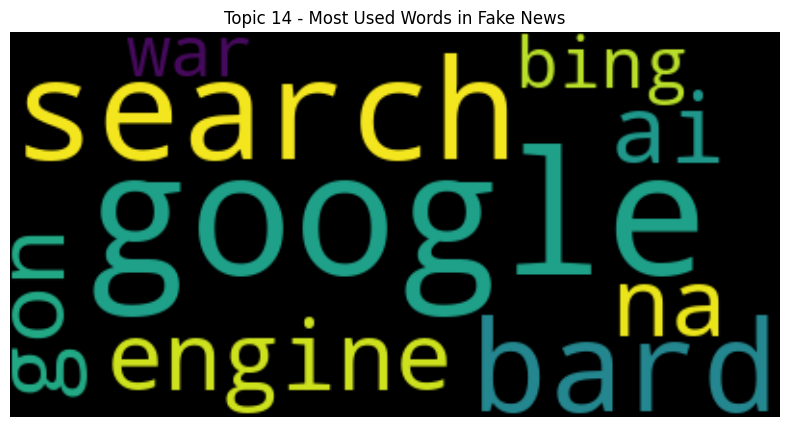

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



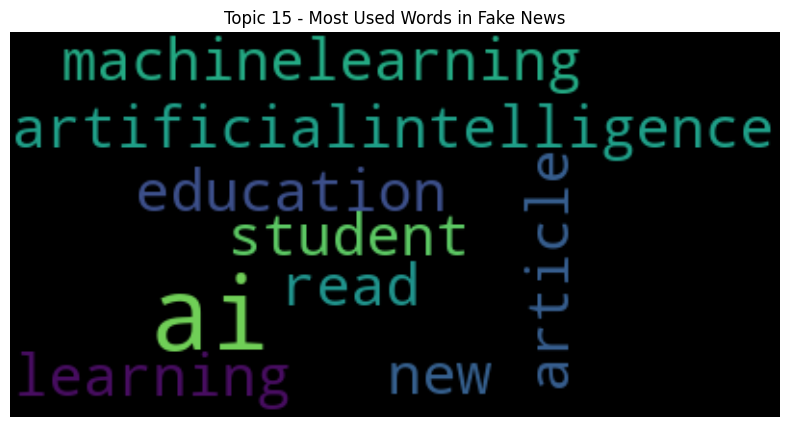

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



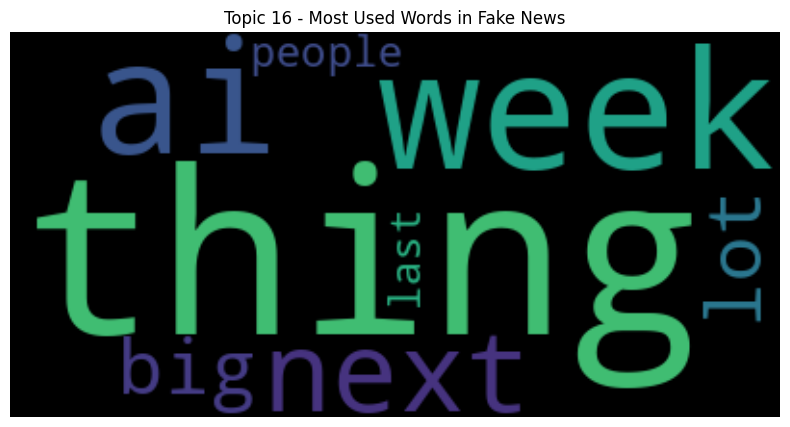

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



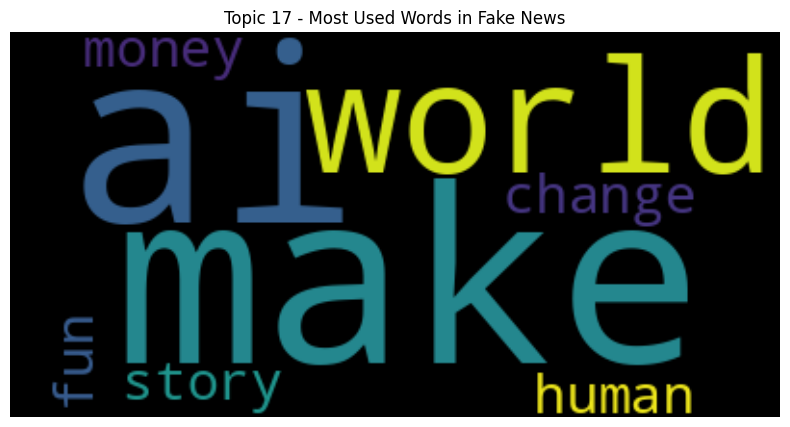

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



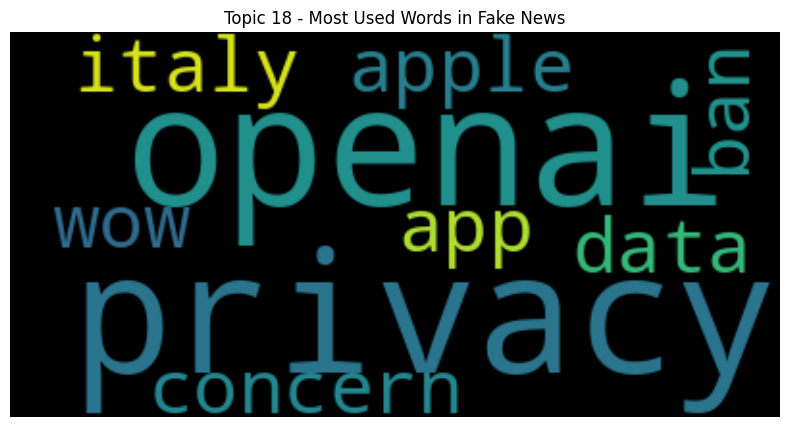

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



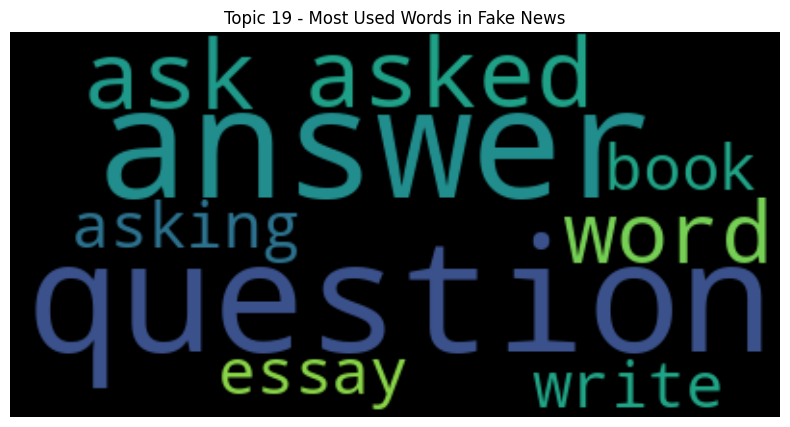

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



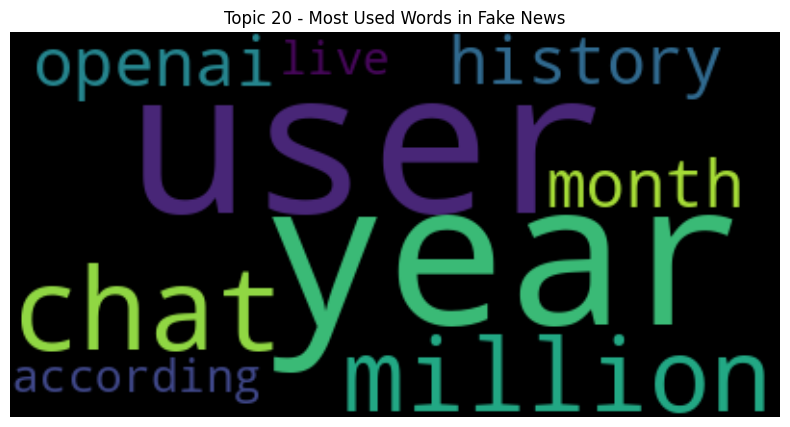

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



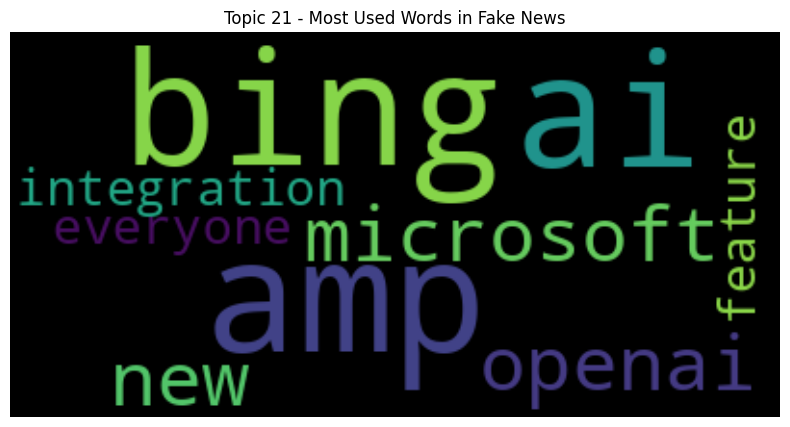

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



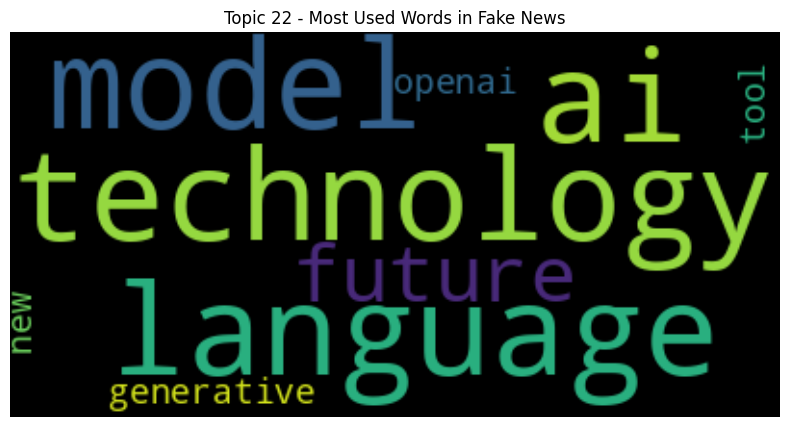

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



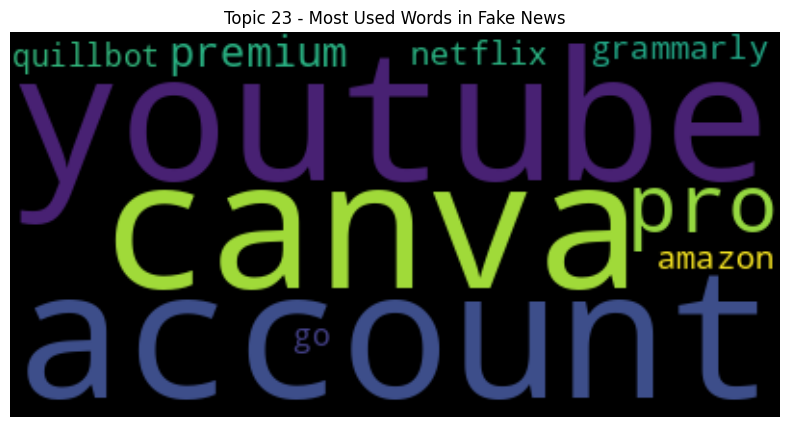

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



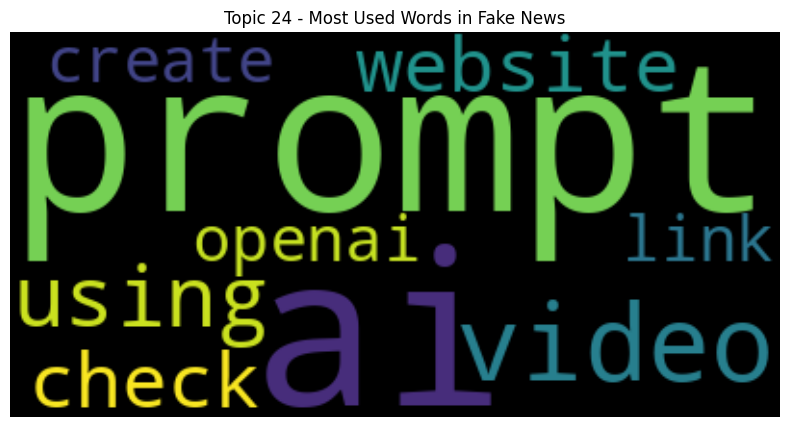

In [20]:
# Iterate through each topic
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]  # Assuming you have a list of feature names
    topic_words = ' '.join(top_words)

    # Generate the word cloud
    wordcloud = WordCloud(width=400, height=200, background_color='black').generate(topic_words)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {topic_idx} - Most Used Words in Fake News")
    plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(-1.0999998894002991,
 1.0999999947258072,
 -1.0999999999588348,
 1.0999999999944066)

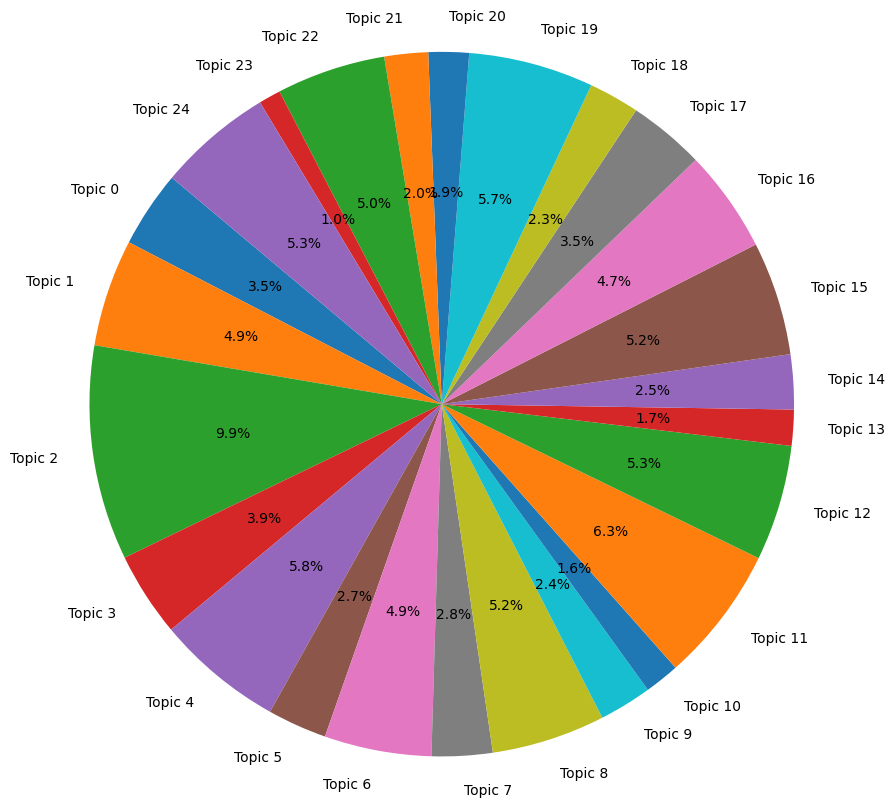

In [21]:

total_documents = len(data)
topic_distribution = topic_matrix.argmax(axis=1)
topic_counts = np.bincount(topic_distribution, minlength=num_topics)

plt.figure(figsize=(10, 10))
plt.pie(topic_counts, labels=[f"Topic {i}" for i in range(num_topics)], autopct="%1.1f%%", startangle=140)
plt.axis("equal")  # Equal aspect

In [22]:
processed_text = data['processed_text'].apply(lambda x: x.split())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
dictionary = Dictionary(processed_text)
corpus = [dictionary.doc2bow(text) for text in processed_text]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.lda_model.prepare(lda_model, X, vectorizer)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Save the visualization as an HTML file
output_html_path = "lda_visualization.html"
pyLDAvis.save_html(vis, output_html_path)

# Display a success message
print(f"Visualization saved as {output_html_path}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Visualization saved as lda_visualization.html


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



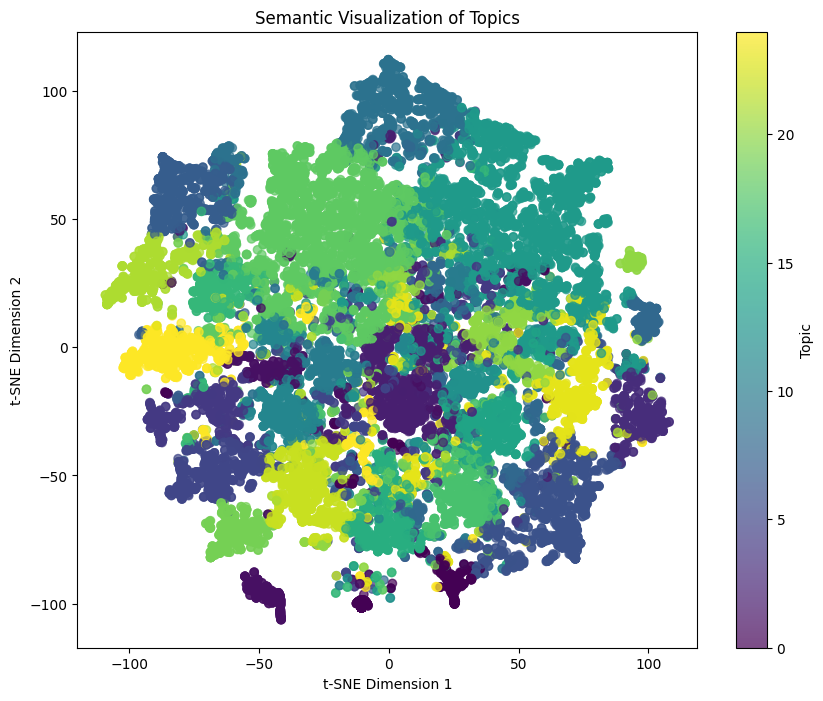

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
tsne_topics = tsne.fit_transform(topic_matrix)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_topics[:, 0], tsne_topics[:, 1], c=topic_distribution, cmap='viridis', alpha=0.7)
plt.colorbar(label='Topic')
plt.title('Semantic Visualization of Topics')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



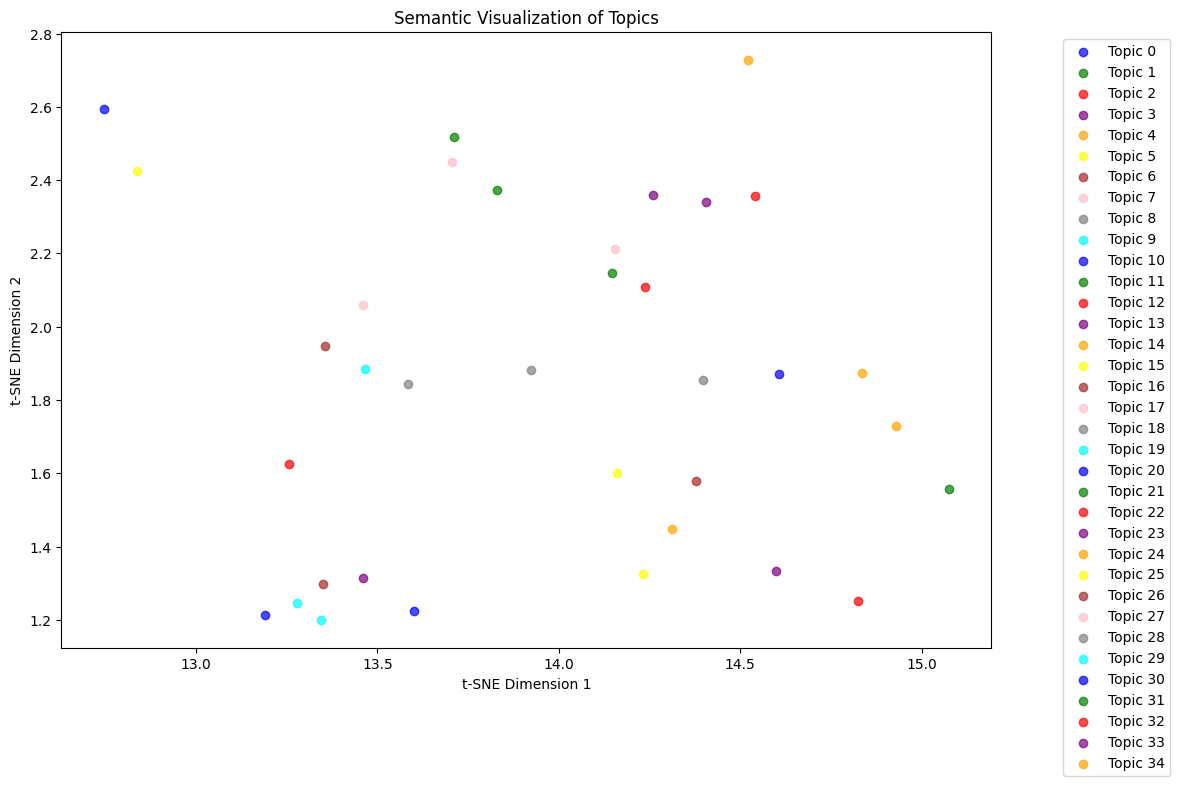

In [ ]:
# Subset of topic_matrix for visualization
num_samples = 35

subset_topic_matrix = topic_matrix[:num_samples]

# Fit t-SNE to subset_topic_matrix
tsne = TSNE(n_components=2, random_state=42)
tsne_topics = tsne.fit_transform(subset_topic_matrix)

# Create a scatter plot
plt.figure(figsize=(12, 8))  # Adjust the figsize as needed

# Define a list of colors for each topic
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'grey', 'cyan']

# Scatter plot with labels for each topic
for topic_idx, (x, y) in enumerate(tsne_topics):
    plt.scatter(x, y, color=colors[topic_idx % len(colors)], label=f"Topic {topic_idx}", alpha=0.7)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.title('Semantic Visualization of Topics')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()
